In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [2]:
import sklearn as sk
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv',sep=',')

In [4]:
#balanceamento da base
train.Churn.sum()/train.shape[0]  #está bom o balanceamento. até 10, 15% ta bom

0.2653532126375577

In [5]:
test = pd.read_csv('test.csv', sep=',')

### Juntar train e test pq as mudanças que vou fazer tem que ser nas duas pra depois rodar na base test tmbm

In [6]:
#para juntar treino e teste tem que ter mesmas colunas 
test['Churn'] = 9999
test['test'] = 1
train['test'] = 0

In [7]:
test.shape

(1409, 22)

In [8]:
test.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,test
0,5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,9999,1
1,1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,No,NaN,99.00,5969.3,9999,1
2,5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,9999,1
3,6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,9999,1
4,364,Female,0,No,No,47.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,9999,1


In [9]:
train.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,test
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,...,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,0


In [10]:
#unindo treino e teste
frames = [train, test]

df = pd.concat(frames, ignore_index=True)

In [11]:
df

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,test
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,...,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4897,Male,0,No,NaN,24.0,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Mailed check,49.70,1167.8,9999,1
7039,6940,Male,0,No,No,35.0,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,One year,Yes,Electronic check,89.20,3251.3,9999,1
7040,804,Female,0,Yes,No,46.0,Yes,No,DSL,No,...,Yes,Yes,No,Two year,Yes,Credit card (automatic),64.20,3009.5,9999,1
7041,1143,Male,1,Yes,Yes,11.0,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),75.20,775.3,9999,1


In [12]:
df.shape

(7043, 22)

In [13]:
#verificando se uniu corretamente train e test
train.shape[0]+test.shape[0]

7043

In [14]:
test['Contract'].value_counts() #se fosse mes a mes poderia trocar por var ordinal

Month-to-month    791
Two year          337
One year          281
Name: Contract, dtype: int64

In [15]:
#colunas que são objects
test.dtypes[test.dtypes=='object'].index

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [16]:
#nao susbstitui pq tem um espaço vazio que é string
#pd.to_numeric(df['TotalCharges']) 
df.TotalCharges.sort_values()

6931          
6697          
5947          
2145          
161           
         ...  
279     997.75
6994     998.1
2856    999.45
1880     999.8
6464     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [17]:

df.loc[df['TotalCharges'] == ' ','TotalCharges'] = 0

In [18]:
#usar a var total charges. mudando de object para float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [19]:
df.shape

(7043, 22)

In [20]:
df.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,test
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,...,Yes,No,No,Two year,No,NaN,45.05,2560.10,0,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,0,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.80,1,0


In [21]:
# substituir no e yes por 0 e 1

In [22]:
df['PhoneService'] = df['PhoneService'].str.replace('No','0')
df['PhoneService'] = df['PhoneService'].str.replace('Yes','1')

In [23]:
df.PhoneService.value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

In [24]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [25]:
df.loc[df['MultipleLines'] != 'Yes','MultipleLines'] = 0

In [26]:
df.loc[df['MultipleLines'] == 'Yes','MultipleLines'] = 1

In [27]:
df.MultipleLines.value_counts()

0    4072
1    2971
Name: MultipleLines, dtype: int64

In [28]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [29]:
df['InternetService2'] = df['InternetService']

In [30]:
df.loc[df['InternetService2'] != 'No','InternetService2'] = 1

In [31]:
df.loc[df['InternetService2'] == 'No','InternetService2'] = 0

In [32]:
df.InternetService2.value_counts()

1    5517
0    1526
Name: InternetService2, dtype: int64

In [33]:
df.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [34]:
df['OnlineSecurity2'] = df['OnlineSecurity']

In [35]:
df.loc[df['OnlineSecurity2'] != 'Yes','OnlineSecurity2'] = 0

In [36]:
df.loc[df['OnlineSecurity2'] == 'Yes','OnlineSecurity2'] = 1

In [37]:
df.OnlineSecurity2.value_counts()

0    5024
1    2019
Name: OnlineSecurity2, dtype: int64

In [38]:
df.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [39]:
df['OnlineBackup2'] = df['OnlineBackup']

In [40]:
df.loc[df['OnlineBackup2'] != 'Yes','OnlineBackup2'] = 0

In [41]:
df.loc[df['OnlineBackup2'] == 'Yes','OnlineBackup2'] = 1

In [42]:
df.OnlineBackup2.value_counts()

0    4614
1    2429
Name: OnlineBackup2, dtype: int64

In [43]:
df.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [44]:
df['DeviceProtection2'] = df['DeviceProtection']

In [45]:
df.loc[df['DeviceProtection2'] != 'Yes','DeviceProtection2'] = 0

In [46]:
df.loc[df['DeviceProtection2'] == 'Yes','DeviceProtection2'] = 1

In [47]:
df.DeviceProtection2.value_counts()

0    4621
1    2422
Name: DeviceProtection2, dtype: int64

In [48]:
df['TechSupport2'] = df['TechSupport']

In [49]:
df.TechSupport2.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport2, dtype: int64

In [50]:
df.loc[df['TechSupport2'] != 'Yes','TechSupport2'] = 0

In [51]:
df.loc[df['TechSupport2'] == 'Yes','TechSupport2'] = 1

In [52]:
df.TechSupport2.value_counts()

0    4999
1    2044
Name: TechSupport2, dtype: int64

In [53]:
df.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [54]:
df['StreamingTV2'] = df['StreamingTV']

In [55]:
df.loc[df['StreamingTV2'] != 'Yes','StreamingTV2'] = 0

In [56]:
df.loc[df['StreamingTV2'] == 'Yes','StreamingTV2'] = 1

In [57]:
df.StreamingTV2.value_counts()

0    4336
1    2707
Name: StreamingTV2, dtype: int64

In [58]:
df.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [59]:
df['StreamingMovies2'] = df['StreamingMovies']

In [60]:
df.loc[df['StreamingMovies2'] != 'Yes','StreamingMovies2'] = 0

In [61]:
df.loc[df['StreamingMovies2'] == 'Yes','StreamingMovies2'] = 1

In [62]:
df.StreamingMovies2.value_counts()

0    4311
1    2732
Name: StreamingMovies2, dtype: int64

In [63]:
#df['Produtos'] = df['PhoneService'] +  df['MultipleLines']  + df['InternetService2'] + df['OnlineSecurity2']  + df['OnlineBackup2'] + df['DeviceProtection2']+ df['TechSupport2'] + df['StreamingTV2'] + df['StreamingMovies2'] 

In [64]:
df.dtypes[df.dtypes=='object'].index

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'InternetService2',
       'OnlineSecurity2', 'OnlineBackup2', 'DeviceProtection2', 'TechSupport2',
       'StreamingTV2', 'StreamingMovies2'],
      dtype='object')

In [65]:
df.dtypes.index

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'test', 'InternetService2',
       'OnlineSecurity2', 'OnlineBackup2', 'DeviceProtection2', 'TechSupport2',
       'StreamingTV2', 'StreamingMovies2'],
      dtype='object')

In [66]:
features = [ 'PhoneService', 'MultipleLines','InternetService2','OnlineSecurity2', 'OnlineBackup2',
            'DeviceProtection2', 'TechSupport2','StreamingTV2', 'StreamingMovies2']

In [67]:
for i in features:
    df[i]=df[i].astype(float)

In [68]:
#Criando a feature nova de quantidade de produtos
df['Produtos'] = (df['PhoneService'] +  df['MultipleLines']  + df['InternetService2'] +
df['OnlineSecurity2']  + df['OnlineBackup2'] + df['DeviceProtection2']+ 
df['TechSupport2'] + df['StreamingTV2'] + df['StreamingMovies2'] )

In [69]:
df.dtypes

id                     int64
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure               float64
PhoneService         float64
MultipleLines        float64
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
test                   int64
InternetService2     float64
OnlineSecurity2      float64
OnlineBackup2        float64
DeviceProtection2    float64
TechSupport2         float64
StreamingTV2         float64
StreamingMovies2     float64
Produtos             float64
dtype: object

In [70]:
df.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn,test,InternetService2,OnlineSecurity2,OnlineBackup2,DeviceProtection2,TechSupport2,StreamingTV2,StreamingMovies2,Produtos
0,4030,Female,0,No,No,56.0,0.0,0.0,DSL,Yes,...,0,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0
1,6731,Male,0,Yes,Yes,NaN,1.0,0.0,No,No internet service,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6479,Female,0,Yes,No,60.0,1.0,1.0,Fiber optic,No,...,0,0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,8.0
3,6861,Female,0,No,No,37.0,1.0,1.0,Fiber optic,No,...,1,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,7.0
4,3266,Male,0,Yes,Yes,29.0,1.0,0.0,Fiber optic,No,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


### plotar boxplot em variaveis continuas e se tiver mto outlier da pra trocar por mediana

In [71]:
df.dtypes

id                     int64
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure               float64
PhoneService         float64
MultipleLines        float64
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
test                   int64
InternetService2     float64
OnlineSecurity2      float64
OnlineBackup2        float64
DeviceProtection2    float64
TechSupport2         float64
StreamingTV2         float64
StreamingMovies2     float64
Produtos             float64
dtype: object

In [92]:
quali = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod', 'Produtos']

quanti = ['tenure', 'MonthlyCharges', 'TotalCharges']


In [73]:
df.isnull().sum()

id                     0
gender                 0
SeniorCitizen          0
Partner                0
Dependents           259
tenure               579
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod        129
MonthlyCharges         0
TotalCharges           0
Churn                  0
test                   0
InternetService2       0
OnlineSecurity2        0
OnlineBackup2          0
DeviceProtection2      0
TechSupport2           0
StreamingTV2           0
StreamingMovies2       0
Produtos               0
dtype: int64

In [74]:
df.nunique()

id                   7043
gender                  2
SeniorCitizen           2
Partner                 2
Dependents              2
tenure                 73
PhoneService            2
MultipleLines           2
InternetService         3
OnlineSecurity          3
OnlineBackup            3
DeviceProtection        3
TechSupport             3
StreamingTV             3
StreamingMovies         3
Contract                3
PaperlessBilling        2
PaymentMethod           4
MonthlyCharges       1585
TotalCharges         6531
Churn                   3
test                    2
InternetService2        2
OnlineSecurity2         2
OnlineBackup2           2
DeviceProtection2       2
TechSupport2            2
StreamingTV2            2
StreamingMovies2        2
Produtos                9
dtype: int64

### Resolvendo os valores nulos

In [75]:
#resolvendo os nulos
#trocar por na
#dependetes era sim e não
df['Dependents'] = df['Dependents'].fillna('NA') 

In [76]:
df['Dependents'].value_counts()

No     4746
Yes    2038
NA      259
Name: Dependents, dtype: int64

### verificando se a dist é normal para tratar os nulos da var TENURE

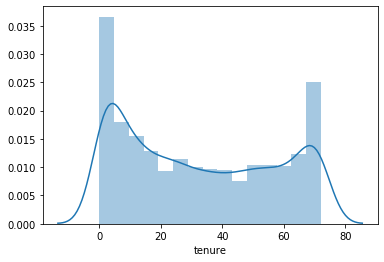

In [77]:
#distribuição de tenure não é dist normal
sns.distplot(df.tenure[df.tenure.notnull()]);

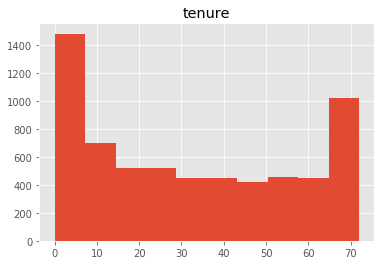

In [78]:
plt.style.use('ggplot')
df.hist('tenure')
plt.show()

#não tem dist normal

#acima vemos que não tem dist normal

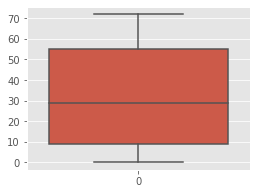

In [79]:
fig, ax = plt.subplots(figsize=(4, 3))

sns.boxplot(data=df.tenure, ax=ax);

#aqui vemos que nao tem outlier
#se tiver mto outlier, melhor usar mediana e nao média
#se a média nao é boa medida, o desvio padrão tmbm nao vai ser pq ele é baseado na média
#box plot --> amplitude interquartil
#o corte no meio é a mediana
# os outliers são os que passam os limites inf e sup

#nesse cao média e mediana estao bem proximas, tanto faz por qual substituir



In [80]:
#tenure são numeros. substitui nulos pela média
#ver a distribuição disso se é normal. se média ta centralizada. dependendo da quantidade de nulos, vale a pena substituir por media ou mediana
# se for pouco nulo a proba de ser a média é alta
df['tenure'] = df['tenure'].fillna(32) 

In [81]:
#payment method é string
#trocar o faltante por electronic check pq é bem pouco. se fosse mais dava pra criar categoria faltante

df['PaymentMethod'] = df['PaymentMethod'].fillna('Electronic check') 

In [82]:
df['PaymentMethod'].value_counts()

Electronic check             2446
Mailed check                 1585
Bank transfer (automatic)    1519
Credit card (automatic)      1493
Name: PaymentMethod, dtype: int64

In [83]:
df.isnull().sum() #nulos resolvidos

id                   0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
test                 0
InternetService2     0
OnlineSecurity2      0
OnlineBackup2        0
DeviceProtection2    0
TechSupport2         0
StreamingTV2         0
StreamingMovies2     0
Produtos             0
dtype: int64

In [84]:
df.describe()
#boxplot de todas as var continuas pra substituir outliers
#da pra criar novas var a partir das que tem

,id,SeniorCitizen,tenure,PhoneService,MultipleLines,MonthlyCharges,TotalCharges,Churn,test,InternetService2,OnlineSecurity2,OnlineBackup2,DeviceProtection2,TechSupport2,StreamingTV2,StreamingMovies2,Produtos
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3522.000000,0.162147,32.328979,0.903166,0.421837,64.761692,2279.734304,2000.580151,0.200057,0.783331,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,4.146244
std,2033.283305,0.368612,23.507909,0.295752,0.493888,30.090047,2266.794470,4000.203711,0.400071,0.412004,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,2.312720
min,1.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1761.500000,0.000000,10.000000,1.000000,0.000000,35.500000,398.550000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,3522.000000,0.000000,32.000000,1.000000,0.000000,70.350000,1394.550000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,5282.500000,0.000000,53.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000
max,7043.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,9999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [85]:
df['TotalCharges'].nunique()

6531

In [86]:
df.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn,test,InternetService2,OnlineSecurity2,OnlineBackup2,DeviceProtection2,TechSupport2,StreamingTV2,StreamingMovies2,Produtos
0,4030,Female,0,No,No,56.0,0.0,0.0,DSL,Yes,...,0,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0
1,6731,Male,0,Yes,Yes,32.0,1.0,0.0,No,No internet service,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6479,Female,0,Yes,No,60.0,1.0,1.0,Fiber optic,No,...,0,0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,8.0
3,6861,Female,0,No,No,37.0,1.0,1.0,Fiber optic,No,...,1,0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,7.0
4,3266,Male,0,Yes,Yes,29.0,1.0,0.0,Fiber optic,No,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [87]:
df.describe()

,id,SeniorCitizen,tenure,PhoneService,MultipleLines,MonthlyCharges,TotalCharges,Churn,test,InternetService2,OnlineSecurity2,OnlineBackup2,DeviceProtection2,TechSupport2,StreamingTV2,StreamingMovies2,Produtos
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3522.000000,0.162147,32.328979,0.903166,0.421837,64.761692,2279.734304,2000.580151,0.200057,0.783331,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,4.146244
std,2033.283305,0.368612,23.507909,0.295752,0.493888,30.090047,2266.794470,4000.203711,0.400071,0.412004,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,2.312720
min,1.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1761.500000,0.000000,10.000000,1.000000,0.000000,35.500000,398.550000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,3522.000000,0.000000,32.000000,1.000000,0.000000,70.350000,1394.550000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,5282.500000,0.000000,53.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000
max,7043.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,9999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


### Box plots para substituir outliers caso necessário

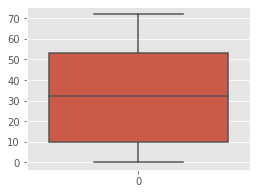

In [88]:
fig, ax = plt.subplots(figsize=(4, 3))

sns.boxplot(data=df.tenure, ax=ax);



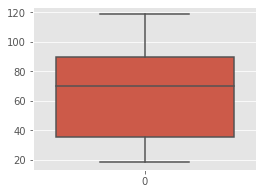

In [89]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.boxplot(data=df.MonthlyCharges, ax=ax);


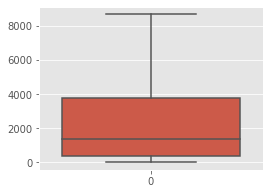

In [90]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.boxplot(data=df.TotalCharges, ax=ax);


### Heat map pra ver relação entre variáveis

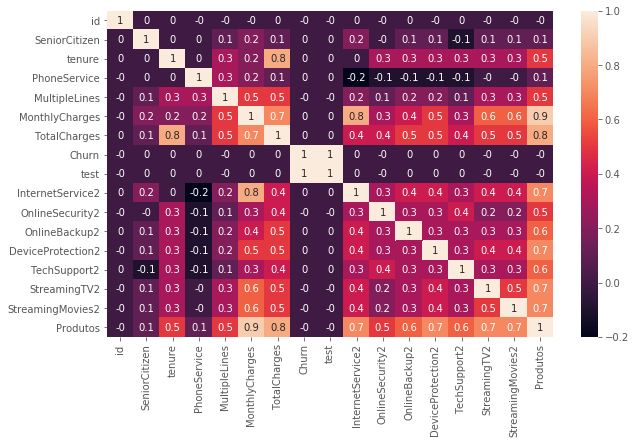

In [91]:
import seaborn as sns

plt.figure(figsize=(10, 6))

vg_corr = df.corr().round(1)
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

### Dummyzar var categóricas

In [93]:
#one hot enconder = dummies
df_onehot = df[quali].copy()
df_onehot = pd.get_dummies(df_onehot, columns = quali , drop_first = True)
df_onehot

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_1.0,MultipleLines_1.0,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Produtos_2.0,Produtos_3.0,Produtos_4.0,Produtos_5.0,Produtos_6.0,Produtos_7.0,Produtos_8.0,Produtos_9.0
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,1,0,1,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,1,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7039,1,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
7040,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7041,1,1,1,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [94]:
df_onehot.dtypes

gender_Male                              uint8
SeniorCitizen_1                          uint8
Partner_Yes                              uint8
Dependents_No                            uint8
Dependents_Yes                           uint8
PhoneService_1.0                         uint8
MultipleLines_1.0                        uint8
InternetService_Fiber optic              uint8
InternetService_No                       uint8
OnlineSecurity_No internet service       uint8
OnlineSecurity_Yes                       uint8
OnlineBackup_No internet service         uint8
OnlineBackup_Yes                         uint8
DeviceProtection_No internet service     uint8
DeviceProtection_Yes                     uint8
TechSupport_No internet service          uint8
TechSupport_Yes                          uint8
StreamingTV_No internet service          uint8
StreamingTV_Yes                          uint8
StreamingMovies_No internet service      uint8
StreamingMovies_Yes                      uint8
Contract_One 

### Juntando categoricas na base de novo

In [95]:
df2 = pd.concat([df.drop(quali + ['id'], axis=1), df_onehot], axis=1)
df2.head()

,tenure,MonthlyCharges,TotalCharges,Churn,test,InternetService2,OnlineSecurity2,OnlineBackup2,DeviceProtection2,TechSupport2,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Produtos_2.0,Produtos_3.0,Produtos_4.0,Produtos_5.0,Produtos_6.0,Produtos_7.0,Produtos_8.0,Produtos_9.0
0,56.0,45.05,2560.10,0,0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,1,0,0,0,0
1,32.0,19.65,332.65,0,0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,60.0,110.80,6640.70,0,0,1.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,37.0,101.90,3545.35,1,0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,29.0,70.75,1974.80,1,0,1.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0


### Train test split

In [96]:
#agora eu tenho uma base pronta pra modelar mas preciso tirar os dados que são do test 

In [97]:
#treino
newdf = df2[(df2.test == 0)]

In [98]:
#essa é a base que tem o teste (precisa enviar resposta disso pro desafio)
df_desafio = df2[(df2.test == 1)]

In [99]:
df_desafio.head()

,tenure,MonthlyCharges,TotalCharges,Churn,test,InternetService2,OnlineSecurity2,OnlineBackup2,DeviceProtection2,TechSupport2,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Produtos_2.0,Produtos_3.0,Produtos_4.0,Produtos_5.0,Produtos_6.0,Produtos_7.0,Produtos_8.0,Produtos_9.0
5634,23.0,20.00,445.30,9999,1,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5635,61.0,99.00,5969.30,9999,1,1.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
5636,36.0,84.75,3050.15,9999,1,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0
5637,61.0,61.45,3751.15,9999,1,1.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
5638,47.0,20.55,945.70,9999,1,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [100]:
df_desafio.shape

(1409, 47)

In [101]:
df_desafio.dtypes

tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
test                                       int64
InternetService2                         float64
OnlineSecurity2                          float64
OnlineBackup2                            float64
DeviceProtection2                        float64
TechSupport2                             float64
StreamingTV2                             float64
StreamingMovies2                         float64
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_No                              uint8
Dependents_Yes                             uint8
PhoneService_1.0                           uint8
MultipleLines_1.0                          uint8
InternetService_Fiber optic                uint8
InternetService_No  

In [102]:
newdf.shape

(5634, 47)

In [103]:
newdf.head()

,tenure,MonthlyCharges,TotalCharges,Churn,test,InternetService2,OnlineSecurity2,OnlineBackup2,DeviceProtection2,TechSupport2,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Produtos_2.0,Produtos_3.0,Produtos_4.0,Produtos_5.0,Produtos_6.0,Produtos_7.0,Produtos_8.0,Produtos_9.0
0,56.0,45.05,2560.10,0,0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,1,0,0,0,0
1,32.0,19.65,332.65,0,0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,60.0,110.80,6640.70,0,0,1.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,37.0,101.90,3545.35,1,0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,29.0,70.75,1974.80,1,0,1.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0


In [104]:
newdf.dtypes

tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
test                                       int64
InternetService2                         float64
OnlineSecurity2                          float64
OnlineBackup2                            float64
DeviceProtection2                        float64
TechSupport2                             float64
StreamingTV2                             float64
StreamingMovies2                         float64
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_No                              uint8
Dependents_Yes                             uint8
PhoneService_1.0                           uint8
MultipleLines_1.0                          uint8
InternetService_Fiber optic                uint8
InternetService_No  

### TIREI test e churn

In [105]:
#tirei a taxa carga mes total pq tinha numeros infinitos e mtos outliers
X = newdf.drop(['Churn']+['test']+ ['InternetService2']+ ['OnlineSecurity2'] + ['OnlineBackup2'] + ['DeviceProtection2'] + ['TechSupport2'] + ['StreamingTV2'] + ['StreamingMovies2'] , axis=1)
y = newdf['Churn']

In [106]:
X.dtypes

tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_No                              uint8
Dependents_Yes                             uint8
PhoneService_1.0                           uint8
MultipleLines_1.0                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes                            uint8
StreamingTV_No inter

In [107]:
y.dtypes

dtype('int64')

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
X_train.dtypes

tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_No                              uint8
Dependents_Yes                             uint8
PhoneService_1.0                           uint8
MultipleLines_1.0                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes                            uint8
StreamingTV_No inter

In [110]:
y_train.shape

(4507,)

In [111]:
X_train.shape

(4507, 38)

In [84]:
#!pip install xgboost

In [112]:

#Import de todos os possível modelos

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor

from sklearn.feature_selection import RFE

clf = XGBRegressor()
rfe = RFE(estimator=clf, n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, y_train)
#melhores 15 features, coerente com os numeros de correlação.

In [113]:
#print('Best 15 Features of Train dataset : ', X_train.columns[rfe.support_])

features_15 = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_1',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check']

In [114]:
#instanciando os modelos
random_forest = RandomForestClassifier()
ada_boost = AdaBoostClassifier()
gradient_boost = GradientBoostingClassifier()


In [115]:
#instanciando os modelos
#random_forest = RandomForestRegressor(n_estimators=100, max_depth = 6)
#ada_boost = AdaBoostRegressor(n_estimators=200, learning_rate= 0.3)
#gradient_boost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2)
#xgb_model = XGBRegressor(max_depth = 4, learning_rate = 0.1, n_estimators = 300, objective='reg:squarederror')

In [116]:

models = [random_forest, ada_boost, gradient_boost]
labels = [ 'Random Forest', 'AdaBoost', 'gradientBoost']

for label,model in zip(labels, models):
    model.fit(X_train, y_train)
    #print('{}: {}'.format(label, mean_squared_error(y_test, model.predict(X_test[features_15]))))
    #print('{}: {}'.format(label, r2_score(y_test, model.predict(X_test[features_15]))))
    print('{}: {}'.format(label, model.score(X_test, y_test)))

Random Forest: 0.8012422360248447
AdaBoost: 0.7941437444543035
gradientBoost: 0.8110026619343389


### entregar com gradient boost com todas variaveis. nesse eu dummizei o produtos

In [117]:
df_desafio.dtypes #tem que tirar churn, test, taxa carga mes total 

tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
test                                       int64
InternetService2                         float64
OnlineSecurity2                          float64
OnlineBackup2                            float64
DeviceProtection2                        float64
TechSupport2                             float64
StreamingTV2                             float64
StreamingMovies2                         float64
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_No                              uint8
Dependents_Yes                             uint8
PhoneService_1.0                           uint8
MultipleLines_1.0                          uint8
InternetService_Fiber optic                uint8
InternetService_No  

In [118]:
df_desafio.Churn.describe()

count    1409.0
mean     9999.0
std         0.0
min      9999.0
25%      9999.0
50%      9999.0
75%      9999.0
max      9999.0
Name: Churn, dtype: float64

In [120]:
#tirando variáveis 
df_desafio = df_desafio.drop(['Churn']+['test'] + ['InternetService2']+ ['OnlineSecurity2'] + ['OnlineBackup2'] + ['DeviceProtection2'] + ['TechSupport2'] + ['StreamingTV2'] + ['StreamingMovies2'], axis=1)

In [121]:
df_desafio.dtypes

tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
SeniorCitizen_1                            uint8
Partner_Yes                                uint8
Dependents_No                              uint8
Dependents_Yes                             uint8
PhoneService_1.0                           uint8
MultipleLines_1.0                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes                            uint8
StreamingTV_No inter

In [122]:
df_desafio.isnull().sum()

tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
SeniorCitizen_1                          0
Partner_Yes                              0
Dependents_No                            0
Dependents_Yes                           0
PhoneService_1.0                         0
MultipleLines_1.0                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [125]:
pred = gradient_boost.predict(df_desafio)

In [126]:
pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [127]:
pred.shape

(1409,)

In [128]:
sub = pd.DataFrame({'id':test.id,'Churn':pred})

In [129]:
sub

,id,Churn
0,5027,0
1,1733,0
2,5384,0
3,6554,0
4,364,0
...,...,...
1404,4897,0
1405,6940,0
1406,804,0
1407,1143,1


In [130]:
# Criando arquivo de submissão

pd.DataFrame({'id':test.id,'Churn':pred}).to_csv("answer5.csv", index= False)

In [131]:
#balanceamento da base
sub.Churn.sum()/sub.shape[0] 

0.22143364088005676